
¡Hola, Alfonso!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>



# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de math para hacer el redondeo con otros métodos

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users=pd.read_csv("/datasets/megaline_users.csv")
plans=pd.read_csv("/datasets/megaline_plans.csv")
calls=pd.read_csv("/datasets/megaline_calls.csv")
internet=pd.read_csv("/datasets/megaline_internet.csv")
msn=pd.read_csv("/datasets/megaline_messages.csv")



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No veo datos ausentes y los tipos de datos en las columas se ven bien en mi opinión. Sin embargo, en la descripción de la información dice que solo se utilizan GB  para poder medir el consumo de internet de los usuarios entonces para tener un mejor manejo de la información al momento de realizar operaciones futuras opté por cambiar la unidad de medida de esta columna.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans["mb_per_month_included"]=plans["mb_per_month_included"]/1024
plans = plans.rename(columns={"mb_per_month_included": "gb_per_month_included"})
print(plans)

   messages_included  gb_per_month_included  minutes_included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#No veo alguno que valga la pena agregar hasta este momento

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios

print(users.sample(10))

     user_id first_name  last_name  age  \
227     1227     Vanesa     Willis   29   
108     1108   Porfirio       Kane   45   
442     1442    Terrell   Caldwell   66   
9       1009      Gerry     Little   19   
357     1357        Ria      Beach   61   
44      1044     Devora   Galloway   74   
12      1012    Jonelle    Mcbride   59   
488     1488    Shirley      Jones   29   
194     1194     Robert     Mclean   40   
315     1315       Mora  Schroeder   45   

                                          city    reg_date      plan  \
227        Dallas-Fort Worth-Arlington, TX MSA  2018-01-17      surf   
108                     Salt Lake City, UT MSA  2018-12-30  ultimate   
442  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-05-25  ultimate   
9       San Jose-Sunnyvale-Santa Clara, CA MSA  2018-04-22      surf   
357                        Baton Rouge, LA MSA  2018-05-30      surf   
44                         Albuquerque, NM MSA  2018-08-30      surf   
12      Chicago-Naperv

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1.- user_id aparece como int, me gustaría que fuera object

2.- first, last name y city tienen mayusculas al principio, los movería a minusculas para evitar duplicados o si necesito citar informarción de alguno de ellos en especifico en un futuro.

3.- separa la ciudad de la abreviatura.

4.- cambiar reg_date y churn_date a datos tipo datatime

5.- reemplazar los valores nulos en churn_date por la palabra "none"

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:

#1.- user_id aparece como int, me gustaría que fuera object
users["user_id"]=users["user_id"].astype(object)


#2.- first y last name tienen mayusculas al principio, los movería a mayusculas para evitar duplicados o si necesito citar informarción de alguno de ellos en especifico en un futuro.
users["first_name"]=users["first_name"].str.lower()
users["last_name"]=users["last_name"].str.lower()

#3.- separa la ciudad de la abreviatura.
users[["city","city_code"]]=users["city"].str.split(",",expand=True)
users["city_code"]=users["city_code"].str.strip()


In [10]:
users=users.reindex(columns=["user_id","first_name","last_name","age","city","city_code","reg_date","plan","churn_date"])
users["city"]=users["city"].str.lower()
users["city_code"]=users["city_code"].str.lower()


#5.- reemplazar los valores nulos en churn_date por la palabra "none"(voy a esperarme a ver como se desenvuelve el pryecto para optar por cambiar estos valores nulos)
#users["churn_date"]=users["churn_date"].fillna("none",inplace=True)

                                              
#4.- cambiar reg_date y churn_date a datos tipo datatime
users["reg_date"]=pd.to_datetime(users["reg_date"],format="%Y-%m-%d")
users["churn_date"]=pd.to_datetime(users["churn_date"],format="%Y-%m-%d")


In [11]:
print(users.info())
print(users.sample(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   city_code   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   plan        500 non-null    object        
 8   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 35.3+ KB
None
    user_id first_name last_name  age                              city  \
5      1005      livia   shields   31       dallas-fort worth-arlington   
348    1348       carl  rutledge   60           detroit-warren-dearborn   
150    1150     earlie     giles   46  houston-the woodlands-sugar l

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
#No hasta el momento

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [14]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(15))

              id  user_id   call_date  duration
97298   1347_124     1347  2018-10-14      3.06
48964    1176_63     1176  2018-12-28      0.00
10148    1046_14     1046  2018-08-24      0.00
83145    1301_59     1301  2018-12-30      2.34
102855   1365_51     1365  2018-11-06      3.36
30327    1114_43     1114  2018-10-16      5.27
47386   1171_417     1171  2018-07-28      0.32
69337   1249_128     1249  2018-09-13     11.05
98635   1353_342     1353  2018-12-03      0.00
44047    1160_63     1160  2018-06-12      0.00
82122    1296_10     1296  2018-12-13      9.06
14199   1059_427     1059  2018-05-08     14.91
88818   1324_878     1324  2018-05-14      0.00
86185    1318_10     1318  2018-11-28     13.67
7851     1037_29     1037  2018-12-24      7.31


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1.- cambiar user_id a object

2.- call_date a datetime

3.-hacer una columna nueva con duration redondeada

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:

#1.- cambiar user_id a object

calls["user_id"]=calls["user_id"].astype(object)

#2.- call_date a datetime
calls["call_date"]=pd.to_datetime(calls["call_date"],format="%Y-%m-%d")
#3.-hacer una columna nueva con duration redondeada

calls["duration_rounded"]=np.ceil(calls["duration"]).astype(int)
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  object        
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_rounded  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

In [16]:
print(calls.sample(10))

              id user_id  call_date  duration  duration_rounded
127725    1457_5    1457 2018-12-28     11.50                12
88384   1324_434    1324 2018-10-02      3.14                 4
132727  1478_181    1478 2018-10-07      5.85                 6
127159  1454_149    1454 2018-10-26      0.00                 0
124128  1438_176    1438 2018-11-02     15.51                16
100954   1361_56    1361 2018-11-17     10.25                11
81643   1293_949    1293 2018-08-30      0.00                 0
16244   1064_102    1064 2018-12-07      0.00                 0
106624  1377_176    1377 2018-09-13      9.66                10
31782   1120_128    1120 2018-06-13     14.55                15


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
#añadi una columna con los minutos redondeados

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(msn.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [19]:
# Imprime una muestra de datos para los mensajes

print(msn.sample(10))

             id  user_id message_date
17001   1113_58     1113   2018-08-01
30489   1193_12     1193   2018-09-13
33914    1214_8     1214   2018-10-25
25628  1154_211     1154   2018-10-11
51308   1334_26     1334   2018-05-15
45458   1309_12     1309   2018-12-16
70405   1458_46     1458   2018-09-12
21311  1132_600     1132   2018-11-24
33078   1206_88     1206   2018-11-30
60508  1381_621     1381   2018-11-15


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1.- user_id cambiarlo a object

2.- message_date cambiarlo a datetime


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
#1.- user_id cambiarlo a object


msn["user_id"]=msn["user_id"].astype(object)

#2.- message_date cambiarlo a datetime

msn["message_date"]=pd.to_datetime(msn["message_date"],format="%Y-%m-%d")
print(msn.info())
print(msn.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None
             id user_id message_date
28955   1176_96    1176   2018-11-08
73990  1475_124    1475   2018-11-10
14697   1100_19    1100   2018-10-16
65263   1419_72    1419   2018-12-14
22327  1133_367    1133   2018-11-20
57374  1362_457    1362   2018-05-04
18285   1120_32    1120   2018-06-28
71539  1466_191    1466   2018-08-30
35915  1236_196    1236   2018-05-24
75997   1496_61    1496   2018-09-14


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
#por el momento no veo algo que necesite

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [23]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample(10))


              id  user_id session_date  mb_used
65667     1303_7     1303   2018-12-20   637.95
91871   1425_286     1425   2018-10-08   549.07
101732   1488_85     1488   2018-06-19   829.02
38524   1172_179     1172   2018-10-05   831.94
3589      1022_0     1022   2018-12-13     0.00
78291    1365_57     1365   2018-11-10   335.82
102894   1493_12     1493   2018-11-01     0.00
19321    1087_43     1087   2018-11-20   924.07
41025    1185_62     1185   2018-09-03   351.54
43036   1191_215     1191   2018-09-28   512.17


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

1.- user_id a object

2.-session_date a datetime

3.- mb_used a gb_used (crear nueva columna pero no estoy seguro aún. Veremos como se desarrolla el proyecto)

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
#1.- user_id cambiarlo a object


internet["user_id"]=internet["user_id"].astype(object)

#2.- session_date cambiarlo a datetime

internet["session_date"]=pd.to_datetime(internet["session_date"],format="%Y-%m-%d")

#3.- mb_used a gb_used (crear nueva columna pero no estoy seguro aún. Veremos como se desarrolla el proyecto)
internet["gb_used"]=internet["mb_used"]/1024
print(internet.info())
print(internet.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.0+ MB
None
             id user_id session_date  mb_used   gb_used
37459   1170_18    1170   2018-09-27   647.68  0.632500
47099  1210_299    1210   2018-06-02   581.92  0.568281
2088   1010_261    1010   2018-10-15   249.68  0.243828
42681  1189_220    1189   2018-11-23   109.05  0.106494
22809   1105_39    1105   2018-11-12   825.81  0.806455
97362  1458_463    1458   2018-07-26   590.31  0.576475
13681  1064_129    1064   2018-09-22   334.19  0.326357
59582  12

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
#añadí la columna de gb_used para el momento de sumar el consumo de internet por usuario

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.info())
print(plans.T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes
None
                          0         1
messages_included        50      1000
gb_per_month_included  15.0      30.0
minutes_included        500      3000
usd_monthly_pay          20        70
usd_per_gb               10         7
usd_per_message        0.03      0.01
usd_per_minute         0.03      0.01
plan

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

#paso 1.- creamos una columna que nos indique el mes que se realizo cada llamada
calls["month"]=calls["call_date"].dt.month
calls["year"]=calls["call_date"].dt.year

#paso 2.- sacamos una tabla dinamica con el total de llamadas por usuario al mes donde tomamos como medida "call_date" y contamos lasa veces que aparece cada mes por usuario
total_calls=calls.pivot_table(index="user_id",
                             columns="month",
                             values="call_date",
                             aggfunc="count",
                             fill_value=0)

#paso 3.- añadimos la columna de avg_monthly_calls donde sacamos un promedio pero de columnas, no de filas.
total_calls["avg_monthly_calls"]=total_calls.mean(axis=1)
print(total_calls)



month    1   2   3   4   5   6   7   8   9  10  11   12  avg_monthly_calls
user_id                                                                   
1000     0   0   0   0   0   0   0   0   0   0   0   16           1.333333
1001     0   0   0   0   0   0   0  27  49  65  64   56          21.750000
1002     0   0   0   0   0   0   0   0   0  11  55   47           9.416667
1003     0   0   0   0   0   0   0   0   0   0   0  149          12.416667
1004     0   0   0   0  21  44  49  49  42  61  54   50          30.833333
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...                ...
1495     0   0   0   0   0   0   0   0  52  75  61   65          21.083333
1496     0   0   0   0   0   0   0  18  52  46  39   40          16.250000
1497     0   0   0   0   0   0   0   0   0   0   0   54           4.500000
1498     0  37  37  47  35  37  43  44  45  46  41   39          37.583333
1499     0   0   0   0   0   0   0   0  41  53  45   65          17.000000

[481 rows x 13 columns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! la función de pivot_table() es muy recomendable para hacer los códigos más eficientes. Solamente te recomendaria que puedes agregar las siguientes varaibles a la función para que se vean más claros los resultados: 
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()


    
</div>

In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

#sacamos el total de minutos pero utilizamos la columna duration_rounded para efectos de ver cuantos minutos enteros usaron y asi estar en relacion a las politicas e cobro de la compañia

total_mins=calls.pivot_table(index="user_id",
                             columns="month",
                             values="duration_rounded",
                             aggfunc="sum",
                             fill_value=0)

print(total_mins)

month    1    2    3    4    5    6    7    8    9    10   11    12
user_id                                                            
1000      0    0    0    0    0    0    0    0    0    0    0   124
1001      0    0    0    0    0    0    0  182  315  393  426   412
1002      0    0    0    0    0    0    0    0    0   59  386   384
1003      0    0    0    0    0    0    0    0    0    0    0  1104
1004      0    0    0    0  193  275  381  354  301  365  476   427
...      ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...
1495      0    0    0    0    0    0    0    0  302  610  361   492
1496      0    0    0    0    0    0    0  122  414  317  308   294
1497      0    0    0    0    0    0    0    0    0    0    0   300
1498      0  244  266  365  288  238  321  266  363  298  223   339
1499      0    0    0    0    0    0    0    0  346  385  308   496

[481 rows x 12 columns]


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
print(msn.info())
print(msn.sample(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None
              id user_id message_date
62368   1392_143    1392   2018-12-20
68154    1440_20    1440   2018-12-18
36305   1241_109    1241   2018-11-24
15895    1105_94    1105   2018-12-16
15538   1101_595    1101   2018-05-28
35450  1229_1506    1229   2018-12-30
68686   1444_169    1444   2018-11-08
22037  1132_1617    1132   2018-12-13
18286    1120_33    1120   2018-12-08
44041   1293_681    1293   2018-08-16


In [30]:
#paso 1.- creamos una columna que nos indique el mes que se realizo cada mensaje
msn["month"]=msn["message_date"].dt.month
msn["year"]=msn["message_date"].dt.year

#paso 2.- sacamos una tabla dinamica con el total de mensajes por usuario
total_msn=msn.pivot_table(index="user_id",
                             columns="month",
                             values="message_date",
                             aggfunc="count",
                             fill_value=0)


print(total_msn)



month    1   2   3   4   5   6   7   8   9   10  11  12
user_id                                                
1000      0   0   0   0   0   0   0   0   0   0   0  11
1001      0   0   0   0   0   0   0  30  44  53  36  44
1002      0   0   0   0   0   0   0   0   0  15  32  41
1003      0   0   0   0   0   0   0   0   0   0   0  50
1004      0   0   0   0   7  18  26  25  21  24  25  31
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
1491      0   0   0   6  45  54  64  50  50  51  46  43
1492      0   0   0   0   0   0   0   0  11  29  31  37
1494      0   0   0   0   0   0  20  27  21  38  35  33
1496      0   0   0   0   0   0   0   2  21  18  13  11
1497      0   0   0   0   0   0   0   0   0   0   0  50

[402 rows x 12 columns]


In [31]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

print(internet.info())
print(internet.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.0+ MB
None
             id user_id session_date  mb_used   gb_used
47820  1214_194    1214   2018-07-02     0.00  0.000000
20996   1098_13    1098   2018-10-10   247.30  0.241504
18615  1082_368    1082   2018-11-24   563.59  0.550381
18908  1084_170    1084   2018-11-17   299.71  0.292686
48361   1215_83    1215   2018-10-04   430.43  0.420342
82624  1385_375    1385   2018-05-24   664.66  0.649082
69076  1321_671    1321   2018-06-02   141.06  0.137754
55886  12

In [32]:
#paso 1.- creamos dos columnas, una por año y otra por mes
internet["month"]=internet["session_date"].dt.month
internet["year"]=internet["session_date"].dt.year

#paso 2.- sacamos una tabla dinamica con el total de gb utilizados
total_usage=internet.pivot_table(index="user_id",
                             columns="month",
                             values="gb_used",
                             aggfunc="sum",
                             fill_value=0)

#paso 3.- redondeamos el consumo mensual de datos para seguir con las politicas de cobro de la compañia
total_usage=np.ceil(total_usage)

print(total_usage)


month     1     2     3     4     5     6     7     8     9     10    11    12
user_id                                                                       
1000     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0
1001     0.0   0.0   0.0   0.0   0.0   0.0   0.0   7.0  14.0  22.0  19.0  19.0
1002     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   7.0  19.0  15.0
1003     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  27.0
1004     0.0   0.0   0.0   0.0   7.0  21.0  24.0  28.0  19.0  15.0  22.0  21.0
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1495     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  23.0  27.0  25.0  24.0
1496     0.0   0.0   0.0   0.0   0.0   0.0   0.0   9.0  17.0  14.0   9.0  17.0
1497     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  11.0
1498     0.0  20.0  20.0  20.0  22.0  15.0  25.0  20.0  23.0  21.0  19.0  23.0
1499     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#paso 1.- tenemos que manejar la información que obtuvimos en por medio de pivot_table y transformarlas a filas con solo una columns
    #calls
total_mins_reset = total_mins.reset_index()
mins_long = total_mins_reset.melt(
    id_vars="user_id",     
    var_name="month",      
    value_name="mins_used"
    
)
    #msn
total_msn_reset = total_msn.reset_index()
msn_long = total_msn_reset.melt(
    id_vars="user_id",     
    var_name="month",      
    value_name="msn_used"
)

    #internet
total_usage_reset = total_usage.reset_index()
usage_long = total_usage_reset.melt(
    id_vars="user_id",     
    var_name="month",      
    value_name="gb_used"
)



#paso 2.- unimos los 3 df 
temp_1=mins_long.merge(msn_long,on=["user_id","month"],how="outer")
final_usage=temp_1.merge(usage_long,on=["user_id","month"],how="outer")

#paso 3.- como utilizamos merge() con outer vamos a sustituir los valores nulos con 0
final_usage["mins_used"]=final_usage["mins_used"].fillna(0)
final_usage["msn_used"]=final_usage["msn_used"].fillna(0)
final_usage["gb_used"]=final_usage["gb_used"].fillna(0)

print(final_usage.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5879
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    5880 non-null   int64  
 1   month      5880 non-null   float64
 2   mins_used  5880 non-null   float64
 3   msn_used   5880 non-null   float64
 4   gb_used    5880 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 275.6 KB
None


In [34]:
# Añade la información de la tarifa
user_usage=final_usage.merge(users,on="user_id",how="left")
print(user_usage.info())
print("\n")
print(user_usage.sample(10))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5879
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     5880 non-null   object        
 1   month       5880 non-null   float64       
 2   mins_used   5880 non-null   float64       
 3   msn_used    5880 non-null   float64       
 4   gb_used     5880 non-null   float64       
 5   first_name  5880 non-null   object        
 6   last_name   5880 non-null   object        
 7   age         5880 non-null   int64         
 8   city        5880 non-null   object        
 9   city_code   5880 non-null   object        
 10  reg_date    5880 non-null   datetime64[ns]
 11  plan        5880 non-null   object        
 12  churn_date  384 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 643.1+ KB
None


     user_id  month  mins_used  msn_used  gb_used first_name  last_name  age  \
133

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario
#paso 1 obtenemos los limites de uso del df "plans"

user_usage_2=user_usage.merge(plans,left_on="plan",right_on="plan_name",how="left")
print(user_usage_2.info())

#print(plans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                5880 non-null   object        
 1   month                  5880 non-null   float64       
 2   mins_used              5880 non-null   float64       
 3   msn_used               5880 non-null   float64       
 4   gb_used                5880 non-null   float64       
 5   first_name             5880 non-null   object        
 6   last_name              5880 non-null   object        
 7   age                    5880 non-null   int64         
 8   city                   5880 non-null   object        
 9   city_code              5880 non-null   object        
 10  reg_date               5880 non-null   datetime64[ns]
 11  plan                   5880 non-null   object        
 12  churn_date             384 non-null    datetime64[ns]
 13  mes

In [36]:
pd.set_option('display.max_columns', None)
print(user_usage_2.sample(5))



     user_id  month  mins_used  msn_used  gb_used first_name last_name  age  \
4959    1158   11.0        0.0       0.0      0.0      robin  thornton   20   
300     1314    1.0        0.0       0.0      0.0      brice    morgan   35   
684     1214    2.0      428.0      15.0     22.0       emil    robles   34   
1956    1033    5.0        0.0       0.0      0.0    latoyia     moran   28   
5311    1020   12.0      500.0       3.0     20.0      rutha      bell   56   

                                     city  city_code   reg_date      plan  \
4959  virginia beach-norfolk-newport news  va-nc msa 2018-11-30  ultimate   
300        los angeles-long beach-anaheim     ca msa 2018-03-06  ultimate   
684        san francisco-oakland-berkeley     ca msa 2018-01-01  ultimate   
1956                        oklahoma city     ok msa 2018-05-30  ultimate   
5311          dallas-fort worth-arlington     tx msa 2018-11-08      surf   

     churn_date  messages_included  gb_per_month_included  min

In [37]:
#primero reviso si tienen el servicio activo durante el mes de uso ya que me di cuenta que cuando use pivot_table me puso 0 en meses donde no se habia usado el servicio pero no indicaba si estaba ya contratado o no.

def active_plan(row):
    
    if row["month"]>=row["reg_date"].month:
        if pd.isna(row["churn_date"])==True or row["month"]<=row["churn_date"].month:
            return "active"
    return "inactive"
user_usage_2["status"]=user_usage_2.apply(active_plan,axis=1)

#paso 2.- calculo el costo de suscripción mensual por el plan que tienen contratado y el status
def payment(row):
    ultimate=70
    surf=20
    
    if row["status"]=="active" and row["plan_name"]=="ultimate":
        return ultimate
    elif row["status"]=="active" and row["plan_name"]=="surf":
        return surf
    else:
        return 0
        
#paso 3.- calculo los cargos extras por exceder el limite de uso mensual        
def extra(row):
    extra_min = 0
    extra_msg = 0
    extra_usage=0

    if row["mins_used"] > row["minutes_included"]:
        extra_min = (row["mins_used"] - row["minutes_included"]) * row["usd_per_minute"]

    if row["msn_used"] > row["messages_included"]:
        extra_msg = (row["msn_used"] - row["messages_included"]) * row["usd_per_message"]

    if row["gb_used"] > row["gb_per_month_included"]:
        extra_msg = (row["gb_used"] - row["gb_per_month_included"]) * row["usd_per_gb"]
    return extra_min + extra_msg + extra_usage

    
user_usage_2["subscription"]=user_usage_2.apply(payment,axis=1)
user_usage_2["extra"]=user_usage_2.apply(extra,axis=1)

#paso 4.- sumo el costo de suscripción y extras en una columna
user_usage_2["total_payment"]=user_usage_2["subscription"]+user_usage_2["extra"]

#paso 5.- muestro información
user_usage_2_resumen=user_usage_2.groupby("plan_name").agg({"total_payment":["sum","mean","max","min"]})
print(user_usage_2_resumen)

          total_payment                        
                    sum       mean     max  min
plan_name                                      
surf          108332.11  27.110138  588.09  0.0
ultimate       75866.00  40.268577  182.00  0.0


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [3]:
""""creo que si redondee los minutos y los gb desde que cree los pivot_table si reiniciamos el kernel el codigo para cuando redondeo minutos esto es el 28 ya que tome como base "duration_rounded" que fue una columna que añadi al principio. en el numero 32 se redondea la columna gb_used utilizando np.ceil() despues de haber creado el pivot_table de total usage. el df "user_usage_2" surge de utilizar merge() para los 3 pivot_table (msn,mins e internet) despues haber utilizado melt() para poder volver filas sus columnas por mes. lo que creo que pasa es que total_payment toma en cuenta el total de minutos,msn y gb extras por su tarifa individual y lo suma a subscription donde solo se pone 70 o 20 dependiendo del plan y si estuvo activo. espero haber entendido, de caso contrario me podrías explicar? por fa jeje"""

'"creo que si redondee los minutos y los gb desde que cree los pivot_table si reiniciamos el kernel el codigo para cuando redondeo minutos esto es el 28 ya que tome como base "duration_rounded" que fue una columna que añadi al principio. en el numero 32 se redondea la columna gb_used utilizando np.ceil() despues de haber creado el pivot_table de total usage. el df "user_usage_2" surge de utilizar merge() para los 3 pivot_table (msn,mins e internet) despues haber utilizado melt() para poder volver filas sus columnas por mes. lo que creo que pasa es que total_payment toma en cuenta el total de minutos,msn y gb extras por su tarifa individual y lo suma a subscription donde solo se pone 70 o 20 dependiendo del plan y si estuvo activo. espero haber entendido, de caso contrario me podrías explicar? por fa jeje'

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [38]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#paso 1.- extraigo la informaicion del plan del df users
calls_2=calls.merge(users,on="user_id",how="left")

#paso 2.- creo dos df distintos por el plan
calls_surf=calls_2.query("plan=='surf'")
calls_ultimate=calls_2.query("plan=='ultimate'")

#paso 3.- obtengo el promedio por plan
duration_calls_surf=calls_surf["duration"].mean().round(1)
duration_calls_ultimate=calls_ultimate["duration"].mean().round(1)

print("el promedio de minutos por llamada para el plan surf es de: ",duration_calls_surf,"y para el plan ultimate es de: ",duration_calls_ultimate, " minutos.")



el promedio de minutos por llamada para el plan surf es de:  6.8 y para el plan ultimate es de:  6.7  minutos.


In [39]:
#paso 4.- creo el df donde le índice es el mes y tengo el promedio de duracion de llamadas para cada plan
calls_user=calls.merge(users,on="user_id",how="left")
calls_user_surf=calls_user.query("plan=='surf'")
calls_user_ultimate=calls_user.query("plan=='ultimate'")

calls_user_surf_avg=calls_user_surf.groupby("month")["duration_rounded"].mean().round(1).reset_index(name="surf")
calls_user_ultimate_avg=calls_user_ultimate.groupby("month")["duration_rounded"].mean().round(1).reset_index(name="ultimate")

calls_user_avg=calls_user_surf_avg.merge(calls_user_ultimate_avg,on="month",how="left")
print(calls_user_avg)

    month  surf  ultimate
0       1   6.8       6.9
1       2   7.3       6.9
2       3   7.1       6.6
3       4   7.2       7.1
4       5   7.2       7.1
5       6   7.3       7.1
6       7   7.1       7.3
7       8   7.1       7.0
8       9   7.1       7.2
9      10   7.1       7.1
10     11   7.2       7.1
11     12   7.2       7.1


<AxesSubplot:title={'center':'Average lenght per call'}, xlabel='Calls per plan', ylabel='Month (represented in numbers)'>

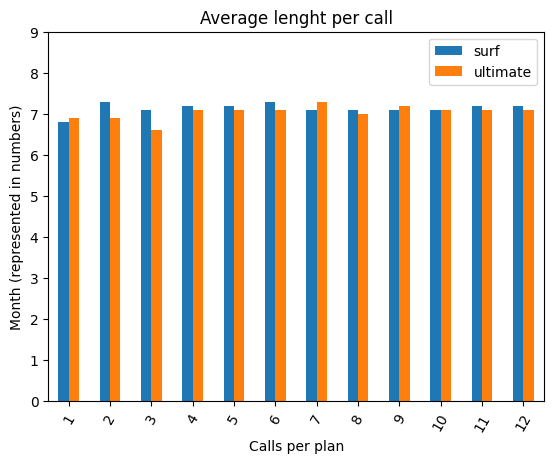

In [40]:
#paso 5.- grafico
calls_user_avg.plot(title="Average lenght per call",
                    x="month",
                   y=["surf","ultimate"],
                   xlabel="Calls per plan",
                    ylabel="Month (represented in numbers)",
                    kind="bar",
                   ylim=[0,9],
                   rot=60)

In [41]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

#paso 1.- obtengo los df con las columnas que necesito y resumido por consumo total por usuario por mes
calls_user_surf_usage=calls_user_surf.groupby(["month","user_id"])["duration_rounded"].sum().reset_index(name="total_mins_used")
calls_user_surf_usage["plan"]="surf"

calls_user_ultimate_usage=calls_user_ultimate.groupby(["month","user_id"])["duration_rounded"].sum().reset_index(name="total_mins_used")
calls_user_ultimate_usage["plan"]="ultimate"

#paso 2.- concaten los dos df 
calls_user_general=pd.concat([calls_user_surf_usage,calls_user_ultimate_usage],ignore_index=True)

#paso 3.- filtro los datos por plan para graficar
surf_minutes =calls_user_general[calls_user_general["plan"] == "surf"]["total_mins_used"]
ultimate_minutes =calls_user_general[calls_user_general["plan"] == "ultimate"]["total_mins_used"]

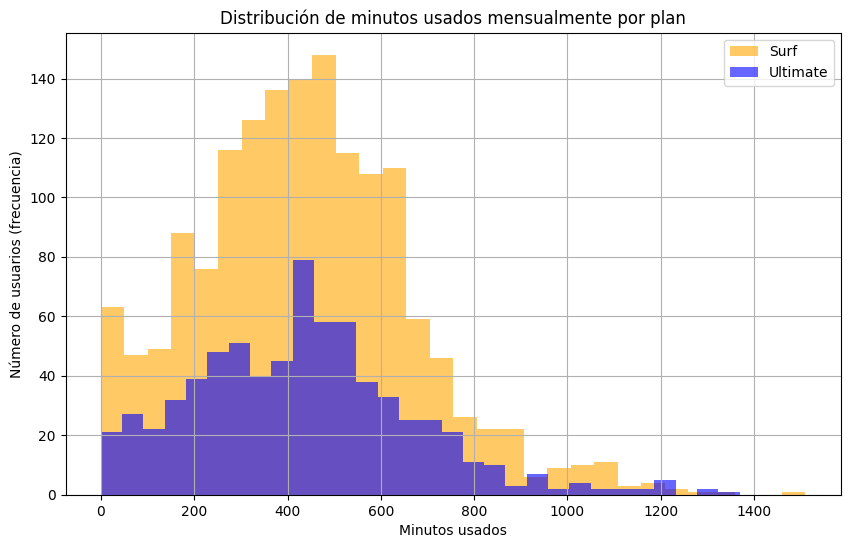

In [42]:
#paso 4.- grafico

plt.figure(figsize=(10, 6))
plt.hist(surf_minutes, bins=30, alpha=0.6, label="Surf", color="orange")
plt.hist(ultimate_minutes, bins=30, alpha=0.6, label="Ultimate", color="blue")

plt.title("Distribución de minutos usados mensualmente por plan")
plt.xlabel("Minutos usados")
plt.ylabel("Número de usuarios (frecuencia)")
plt.legend()
plt.grid(True)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [43]:
# Calcula la media y la varianza de la duración mensual de llamadas.

#varianza
varianza_surf=np.var(calls_user_surf_usage["total_mins_used"])
varianza_ultimate=np.var(calls_user_ultimate_usage["total_mins_used"])
#media
media_surf=calls_user_surf_usage["total_mins_used"].mean()
media_ultimate=calls_user_ultimate_usage["total_mins_used"].mean()

#resultado
print("Los datos para la tarifa surf son los siguientes:")
print("varianza: ",varianza_surf.round(2))
print("media: ",media_surf.round(2))
print("n: ",calls_user_surf_usage.shape[0])
print("\n")
print("mientras que los datos para la tarifa ultimate son:")
print("varianza: ",varianza_ultimate.round(2))
print("media: ",media_ultimate.round(2))
print("n: ",calls_user_ultimate_usage.shape[0])

Los datos para la tarifa surf son los siguientes:
varianza:  52537.04
media:  436.52
n:  1545


mientras que los datos para la tarifa ultimate son:
varianza:  56494.29
media:  434.68
n:  713


Plan surf


<AxesSubplot:xlabel='total_mins_used'>

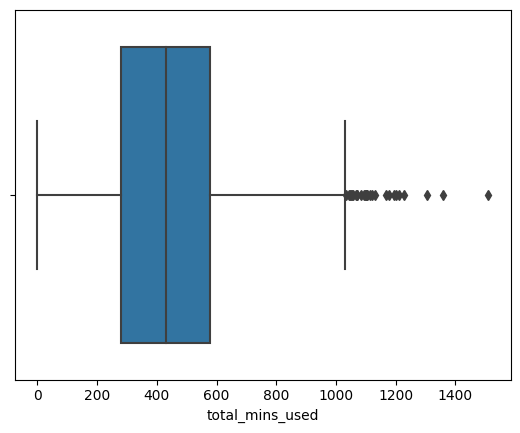

In [44]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
#paso 1.- saco los diagramas de caja para cada plan de telefonia

print("Plan surf")
sns.boxplot(calls_user_surf_usage["total_mins_used"])


Plan ultimate


<AxesSubplot:xlabel='total_mins_used'>

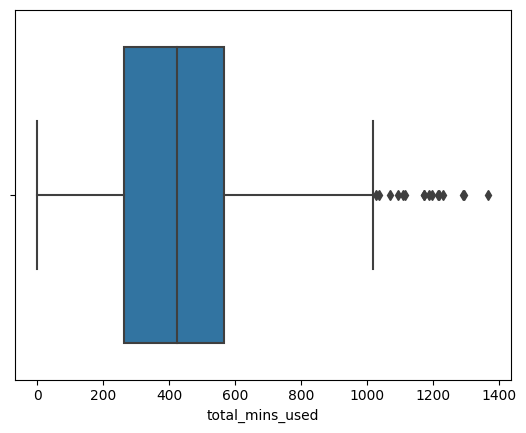

In [45]:
print("Plan ultimate")
sns.boxplot(calls_user_ultimate_usage["total_mins_used"])

In [46]:
#paso 2.- quise sacar .describe() para ver en numero como estaban distribuidos los cuartiles
print("Plan surf")
print(calls_user_surf_usage["total_mins_used"].describe().round(2))
print("________________")
print("Plan ultimate")
print(calls_user_ultimate_usage["total_mins_used"].describe().round(2))

#paso 3.- saco comparativa porcentual entre los dos describe
resumen_surf=calls_user_surf_usage["total_mins_used"].describe().round(2).reset_index(name="surf")
resumen_ultimate=calls_user_ultimate_usage["total_mins_used"].describe().round(2).reset_index(name="ultimate")
resumen_final=resumen_surf.merge(resumen_ultimate,on="index",how="left")
resumen_final["comparativa"]=((resumen_final["surf"]/resumen_final["ultimate"]).round(2))*100



Plan surf
count    1545.00
mean      436.52
std       229.28
min         0.00
25%       279.00
50%       430.00
75%       579.00
max      1510.00
Name: total_mins_used, dtype: float64
________________
Plan ultimate
count     713.00
mean      434.68
std       237.85
min         0.00
25%       263.00
50%       425.00
75%       566.00
max      1369.00
Name: total_mins_used, dtype: float64


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


"""El análisis de la duración promedio de llamadas entre los planes Surf y Ultimate muestra que, en general, no existe una diferencia significativa entre ambos. Al observar el histograma, se aprecia una distribución sesgada a la derecha, lo cual indica que la mayoría de los usuarios realiza un uso moderado de los minutos disponibles. Considerando los límites de minutos incluidos en cada plan —500 para Surf y 3000 para Ultimate—, es evidente que los usuarios del plan Ultimate no suelen aprovechar al máximo este beneficio. Esta situación sugiere que quienes optan por este plan lo hacen posiblemente por dos razones: la primera, para evitar preocuparse por límites y posibles recargos; y la segunda, porque los minutos de llamadas no son un factor determinante en su decisión de plan. Además, los diagramas de caja muestran que los valores del plan Surf tienden a ser ligeramente más altos, aunque en general el comportamiento de consumo entre ambos grupos es similar. Cabe destacar que, debido a los recargos por uso adicional, el costo promedio mensual puede elevarse más para los usuarios del plan Surf, lo cual representa un punto importante al comparar la eficiencia de ambos planes."""

### Mensajes

In [47]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#paso 1.- obtenemos el plan en el que están los usuarios
msn_usage=msn.merge(users,on="user_id",how="left")

#paso 2.- ordenamos por plan, mes y usuario con la cantidad de mensajes enviados por mes
msn_usage_general=msn_usage.groupby(["plan","month","user_id"])["message_date"].count().reset_index(name="msn")
print(msn_usage_general.sample(10))


          plan  month  user_id  msn
1597  ultimate     11     1107   19
777       surf     11     1084   93
963       surf     11     1489   91
1100      surf     12     1251   35
908       surf     11     1350    3
624       surf     10     1182    2
842       surf     11     1215   92
1135      surf     12     1316   70
102       surf      5     1362   65
1602  ultimate     11     1128   42


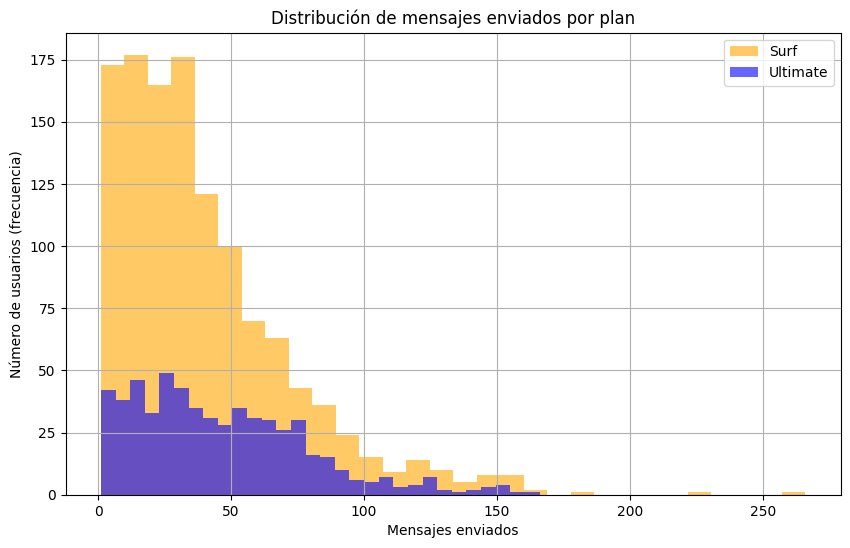

In [48]:
#paso 3.- creamos resumen para grafico de histograma

surf_msn=msn_usage_general[msn_usage_general["plan"] == "surf"]["msn"]
ultimate_msn =msn_usage_general[msn_usage_general["plan"] == "ultimate"]["msn"]

plt.figure(figsize=(10, 6))
plt.hist(surf_msn, bins=30, alpha=0.6, label="Surf", color="orange")
plt.hist(ultimate_msn, bins=30, alpha=0.6, label="Ultimate", color="blue")

plt.title("Distribución de mensajes enviados por plan")
plt.xlabel("Mensajes enviados")
plt.ylabel("Número de usuarios (frecuencia)")
plt.legend()
plt.grid(True)
plt.show()

Plan surf


<AxesSubplot:xlabel='msn'>

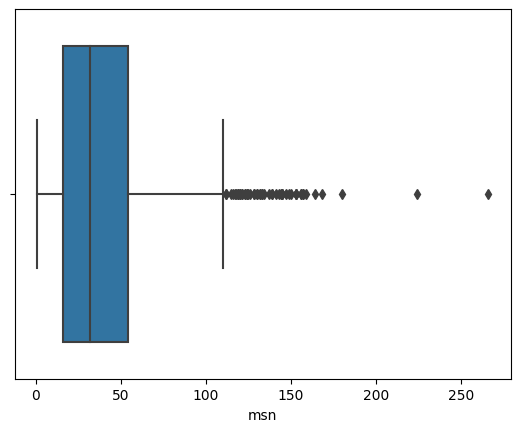

In [49]:
#paso 4.- creamos diagramas de caja
print("Plan surf")

sns.boxplot(surf_msn)

Plan ultimate


<AxesSubplot:xlabel='msn'>

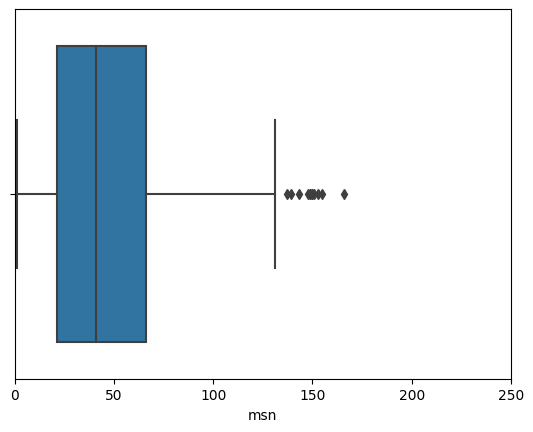

In [50]:
print("Plan ultimate")
plt.xlim(0,250)
sns.boxplot(ultimate_msn)

In [51]:
#paso 5.- comparativa con describe

#varianza
varianza_surf_msn=np.var(surf_msn)
varianza_ultimate_msn=np.var(ultimate_msn)
#media
media_surf_msn=surf_msn.mean()
media_ultimate_msn=ultimate_msn.mean()

#resultado
print("Los datos para la tarifa surf son los siguientes:")
print("varianza: ",varianza_surf_msn.round(2))
print("media: ",media_surf_msn.round(2))
print("n: ",surf_msn.shape[0])
print("\n")
print("mientras que los datos para la tarifa ultimate son:")
print("varianza: ",varianza_ultimate_msn.round(2))
print("media: ",media_ultimate_msn.round(2))
print("n: ",ultimate_msn.shape[0])
print("\n")
print("________________")

#describe
surf_msn2=msn_usage_general[msn_usage_general["plan"] == "surf"]
ultimate_msn2=msn_usage_general[msn_usage_general["plan"] == "ultimate"]

print("Plan surf")
print(surf_msn.describe().round(2))
print("________________")
print("Plan ultimate")
print(ultimate_msn.describe().round(2))



Los datos para la tarifa surf son los siguientes:
varianza:  1090.45
media:  40.11
n:  1222


mientras que los datos para la tarifa ultimate son:
varianza:  1083.32
media:  46.3
n:  584


________________
Plan surf
count    1222.00
mean       40.11
std        33.04
min         1.00
25%        16.00
50%        32.00
75%        54.00
max       266.00
Name: msn, dtype: float64
________________
Plan ultimate
count    584.00
mean      46.30
std       32.94
min        1.00
25%       21.00
50%       41.00
75%       66.00
max      166.00
Name: msn, dtype: float64


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]


"""El análisis del comportamiento de uso de mensajes por parte de los usuarios en relación al plan contratado revela diferencias más marcadas que las observadas en el uso de llamadas. A través del histograma, se puede apreciar que los usuarios del plan Ultimate (color morado) presentan un comportamiento más uniforme y distribuido a lo largo del eje de los mensajes enviados, mientras que los usuarios del plan Surf concentran su comportamiento hacia los valores más bajos, lo que indica que envían significativamente menos mensajes.

La gráfica de bloques (boxplot) refuerza esta observación: el rango intercuartílico del plan Ultimate está desplazado hacia la derecha, reflejando un mayor número de mensajes enviados por sus usuarios. Sin embargo, resulta interesante notar que los valores extremos en el plan Surf, aunque menos frecuentes, pueden ser incluso más altos que los del plan Ultimate, lo que sugiere una mayor variabilidad en algunos casos particulares.

Finalmente, el análisis estadístico mediante .describe() confirma estas diferencias: el plan Ultimate presenta una media superior en el número de mensajes enviados, así como cuartiles (25%, 50% y 75%) consistentemente más altos en comparación con el plan Surf. Estos hallazgos sugieren que los usuarios del plan Ultimate tienden a hacer un uso más intensivo del servicio de mensajería, posiblemente reflejando un perfil de usuario con mayores necesidades de comunicación o una mayor disposición a aprovechar los beneficios del plan contratado."""


### Internet

In [52]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


#paso 1.- obtenemos el plan en el que están los usuarios
internet_usage=internet.merge(users,on="user_id",how="left")

#paso 2.- ordenamos por plan, mes y usuario con la cantidad de mensajes enviados por mes
internet_usage_general=internet_usage.groupby(["plan","month","user_id"])["gb_used"].count().reset_index(name="gb_used")
print(internet_usage_general.sample(10))

          plan  month  user_id  gb_used
1970  ultimate     10     1390       41
1168      surf     11     1355       49
193       surf      6     1153       11
1926  ultimate     10     1159       31
1546      surf     12     1484       16
1488      surf     12     1371       67
1124      surf     11     1290       21
905       surf     10     1366       52
780       surf     10     1117       58
1129      surf     11     1295       49


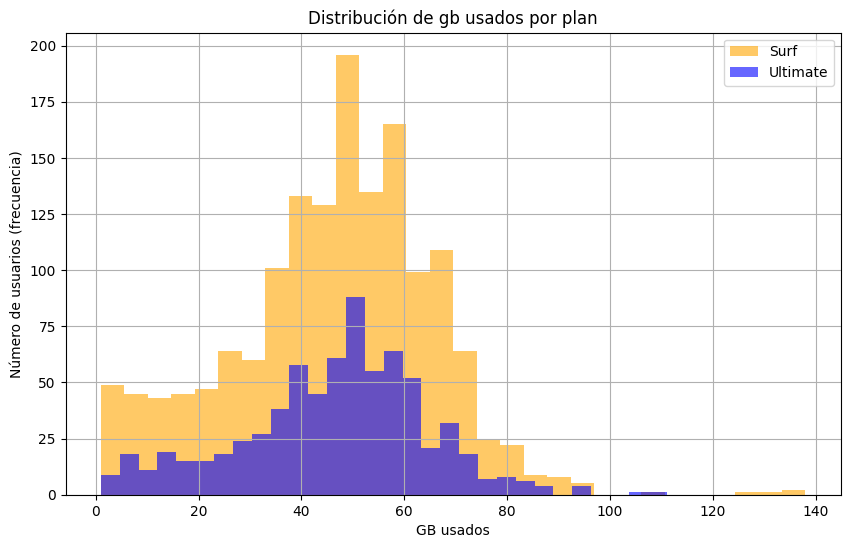

In [53]:
#paso 3.- creamos resumen para grafico de histograma

surf_internet=internet_usage_general[internet_usage_general["plan"] == "surf"]["gb_used"]
ultimate_internet =internet_usage_general[internet_usage_general["plan"] == "ultimate"]["gb_used"]

plt.figure(figsize=(10, 6))
plt.hist(surf_internet, bins=30, alpha=0.6, label="Surf", color="orange")
plt.hist(ultimate_internet, bins=30, alpha=0.6, label="Ultimate", color="blue")

plt.title("Distribución de gb usados por plan")
plt.xlabel("GB usados")
plt.ylabel("Número de usuarios (frecuencia)")
plt.legend()
plt.grid(True)
plt.show()

Plan surf


<AxesSubplot:xlabel='gb_used'>

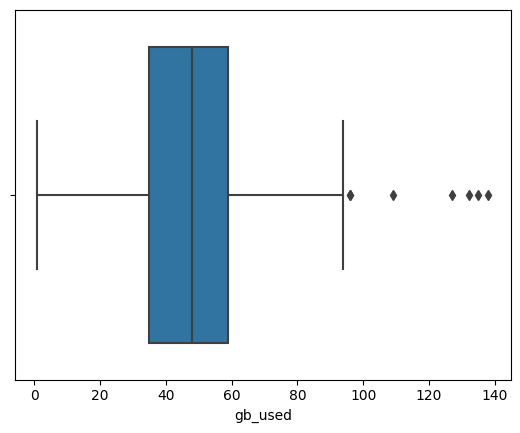

In [54]:
#paso 4.- creamos diagramas de caja
print("Plan surf")
sns.boxplot(surf_internet)

Plan ultimate


<AxesSubplot:xlabel='gb_used'>

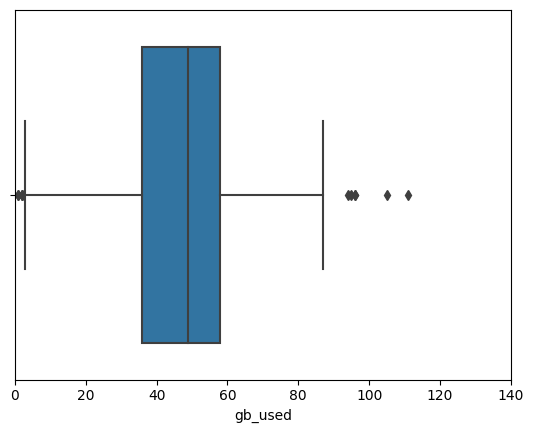

In [55]:

print("Plan ultimate")
plt.xlim(0,140)
sns.boxplot(ultimate_internet)

In [56]:
#paso 5.- comparativa con describe

#varianza
varianza_surf_internet=np.var(surf_internet)
varianza_ultimate_internet=np.var(ultimate_internet)
#media
media_surf_internet=surf_internet.mean()
media_ultimate_internet=ultimate_internet.mean()

#resultado
print("Los datos para la tarifa surf son los siguientes:")
print("varianza: ",varianza_surf_internet.round(2))
print("media: ",media_surf_internet.round(2))
print("n: ",surf_internet.shape[0])
print("\n")
print("mientras que los datos para la tarifa ultimate son:")
print("varianza: ",varianza_ultimate_internet.round(2))
print("media: ",media_ultimate_internet.round(2))
print("n: ",ultimate_internet.shape[0])
print("\n")
print("________________")

#describe
surf_internet2=internet_usage_general[internet_usage_general["plan"] == "surf"]
ultimate_internet2=internet_usage_general[internet_usage_general["plan"] == "ultimate"]

print("Plan surf")
print(surf_internet2["gb_used"].describe().round(2))
print("________________")
print("Plan ultimate")
print(ultimate_internet2["gb_used"].describe().round(2))




Los datos para la tarifa surf son los siguientes:
varianza:  388.75
media:  45.95
n:  1558


mientras que los datos para la tarifa ultimate son:
varianza:  333.73
media:  46.23
n:  719


________________
Plan surf
count    1558.00
mean       45.95
std        19.72
min         1.00
25%        35.00
50%        48.00
75%        59.00
max       138.00
Name: gb_used, dtype: float64
________________
Plan ultimate
count    719.00
mean      46.23
std       18.28
min        1.00
25%       36.00
50%       49.00
75%       58.00
max      111.00
Name: gb_used, dtype: float64


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

"""El análisis del consumo de datos móviles entre los usuarios de ambos planes revela un comportamiento sorprendentemente similar. Las diferencias en el consumo promedio de internet entre las tarifas “Surf” y “Ultimate” son menores al 1%, lo que indica que este servicio no es un factor decisivo a la hora de elegir un plan.

El histograma refuerza esta observación, mostrando distribuciones casi idénticas en los intervalos del eje X (GB utilizados). Esta similitud en el comportamiento de uso proporciona una visión clara del patrón de consumo de datos por parte de los usuarios, independientemente del plan contratado.

Al examinar los diagramas de caja, se observa una mediana ligeramente desplazada hacia la derecha en la tarifa “Ultimate”, lo que podría sugerir un consumo ligeramente mayor. Sin embargo, el rango intercuartílico es muy similar entre ambos planes. Es interesante notar que los valores atípicos (outliers) más altos se presentan con mayor frecuencia en la tarifa “Surf”.

Finalmente, el análisis estadístico utilizando .describe() confirma estas tendencias: tanto la media como la varianza del consumo de datos son prácticamente iguales entre los dos planes. Estos resultados permiten concluir que el uso de internet móvil no influye significativamente en la elección del plan por parte de los usuarios."""


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [57]:
#paso 1.- creamos los dos df por tarifa
plan_surf=user_usage_2.query("plan_name=='surf' and status=='active'")
plan_ultimate=user_usage_2.query("plan_name=='ultimate' and status=='active'")


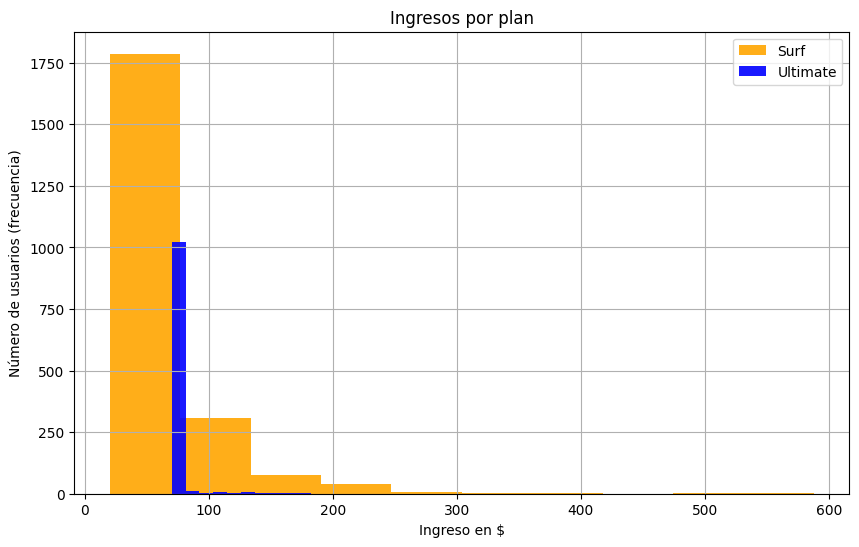

In [58]:
#paso 2.- realizamos histograma
plan_surf_income=plan_surf["total_payment"]
plan_ultimate_income=plan_ultimate["total_payment"]

plt.figure(figsize=(10, 6))
plt.hist(plan_surf_income, bins=10, alpha=0.9, label="Surf", color="orange")
plt.hist(plan_ultimate_income, bins=10, alpha=0.9, label="Ultimate", color="blue")

plt.title("Ingresos por plan")
plt.xlabel("Ingreso en $")
plt.ylabel("Número de usuarios (frecuencia)")
plt.legend()
plt.grid(True)
plt.show()

Color morado representa al plan ultimate y amarillo al plan surf


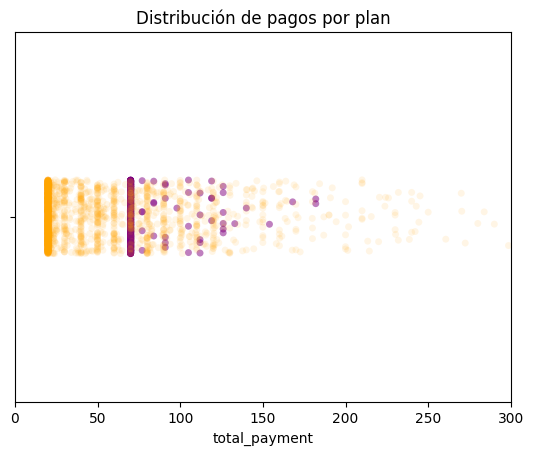

In [59]:
#paso 3.- creamos grafico de dispersion 
plt.xlabel("Total Payment")
plt.title("Distribución de pagos por plan")
plt.xlim(0,300)

sns.stripplot(x=plan_ultimate["total_payment"], alpha=0.5,color="purple")
sns.stripplot(x=plan_surf["total_payment"], alpha=0.1,color="orange")
print("Color morado representa al plan ultimate y amarillo al plan surf")

In [60]:
#paso 4.- comparativa con describe

#varianza
varianza_surf_plan=np.var(plan_surf["total_payment"])
varianza_ultimate_plan=np.var(plan_ultimate["total_payment"])
#media
media_surf_plan=plan_surf["total_payment"].mean()
media_ultimate_plan=plan_ultimate["total_payment"].mean()

#resultado
print("Los datos para la tarifa surf son los siguientes:")
print("varianza: ",varianza_surf_plan.round(2))
print("media: ",media_surf_plan.round(2))
print("n: ",plan_surf.shape[0])
print("\n")
print("mientras que los datos para la tarifa ultimate son:")
print("varianza: ",varianza_ultimate_plan.round(2))
print("media: ",media_ultimate_plan.round(2))
print("n: ",plan_ultimate.shape[0])
print("\n")
print("________________")

#describe
surf_internet2=internet_usage_general[internet_usage_general["plan"] == "surf"]
ultimate_internet2=internet_usage_general[internet_usage_general["plan"] == "ultimate"]

print("Plan surf")
print(plan_surf["total_payment"].describe().round(2))
print("________________")
print("Plan ultimate")
print(plan_ultimate["total_payment"].describe().round(2))

Los datos para la tarifa surf son los siguientes:
varianza:  2465.28
media:  48.15
n:  2227


mientras que los datos para la tarifa ultimate son:
varianza:  89.24
media:  71.57
n:  1060


________________
Plan surf
count    2227.00
mean       48.15
std        49.66
min        20.00
25%        20.00
50%        20.15
75%        60.00
max       588.09
Name: total_payment, dtype: float64
________________
Plan ultimate
count    1060.00
mean       71.57
std         9.45
min        70.00
25%        70.00
50%        70.00
75%        70.00
max       182.00
Name: total_payment, dtype: float64


In [61]:
#paso 5.- probabilidad de exceder el pago de tarifa por cada uno de los dos planes
mu_surf=48.15
sigma_surf=49.66
threshold_surf=20
p_20=1-st.norm(mu_surf,sigma_surf).cdf(threshold_surf)
p_20*=100
p_20=p_20.round(2)

mu_ult=71.57
sigma_ult=9.45
threshold_ult=70

p_70=1-st.norm(mu_ult,sigma_ult).cdf(threshold_ult)
p_70*=100
p_70=p_70.round(2)
print("La probabilidad de que un usuario del plan ultimate pague mas que la tarifa mensual es de: ",p_70,"%")
print("Mientras que la probabilidad para un usuario del plan surf es de: ",p_20,"%")

La probabilidad de que un usuario del plan ultimate pague mas que la tarifa mensual es de:  56.6 %
Mientras que la probabilidad para un usuario del plan surf es de:  71.46 %


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

"""Al analizar los ingresos generados por cada tarifa, se observa un cambio importante respecto a los análisis previos de consumo (minutos, mensajes e internet), donde no se encontraron diferencias significativas en el comportamiento de los usuarios. Si bien los usuarios del plan Ultimate tienden a consumir ligeramente más minutos e internet, los ingresos presentan una diferencia más marcada.

El histograma revela que los usuarios del plan Ultimate mantienen sus pagos en torno a su tarifa fija mensual, con una media más baja y un rango de valores reducido, lo cual sugiere que rara vez incurren en cargos adicionales por sobrepasar los límites incluidos en el plan. En contraste, los usuarios del plan Surf presentan una mayor dispersión en los pagos mensuales, evidenciada por una media más alta, mayor varianza y desviación estándar, lo cual indica una mayor frecuencia de recargos por excedentes.

El segundo gráfico refuerza esta observación: la distribución de pagos del plan Ultimate (color morado) se concentra fuertemente en los 70 USD, su tarifa mensual, con muy pocos valores atípicos. Por otro lado, la distribución del plan Surf (color naranja) muestra una mayor dispersión y valores atípicos más frecuentes por encima de su tarifa base.

Además, al calcular la probabilidad de que un usuario pague más que su tarifa mensual, se observa que:
	•	La probabilidad de que un usuario del plan Ultimate pague más de 70 USD es de apenas 56.6%.
	•	Mientras que en el plan Surf, la probabilidad de superar el pago base es de 71.46%.

En resumen, a pesar de tener comportamientos de consumo similares entre usuarios de ambos planes, el modelo de tarifas genera diferencias importantes en los ingresos. Los usuarios del plan Surf tienden a pagar más en total debido a recargos, mientras que los del plan Ultimate mantienen un pago más estable y predecible. Esto sugiere que el comportamiento de consumo no varía significativamente según el plan, pero los límites y condiciones de cada tarifa sí impactan los ingresos generados por usuario."""

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [74]:
# Prueba las hipótesis
surf_payments=plan_surf["total_payment"]
ultimate_payments=plan_ultimate["total_payment"]
alpha=0.05

result=st.ttest_ind(surf_payments, ultimate_payments, equal_var=False)
print('valor p:',result.pvalue)


if result.pvalue<alpha:
    print("Rechazamos la hipótesis nula, las medias son distintas")
else:
    print("No podemos rechazar la hipótesis nula, las medias son iguales")


valor p: 5.399289329021684e-94
Rechazamos la hipótesis nula, las medias son distintas


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

valor p: 0.025413655587759067
Rechazamos la hipótesis nula, las medias son distintas


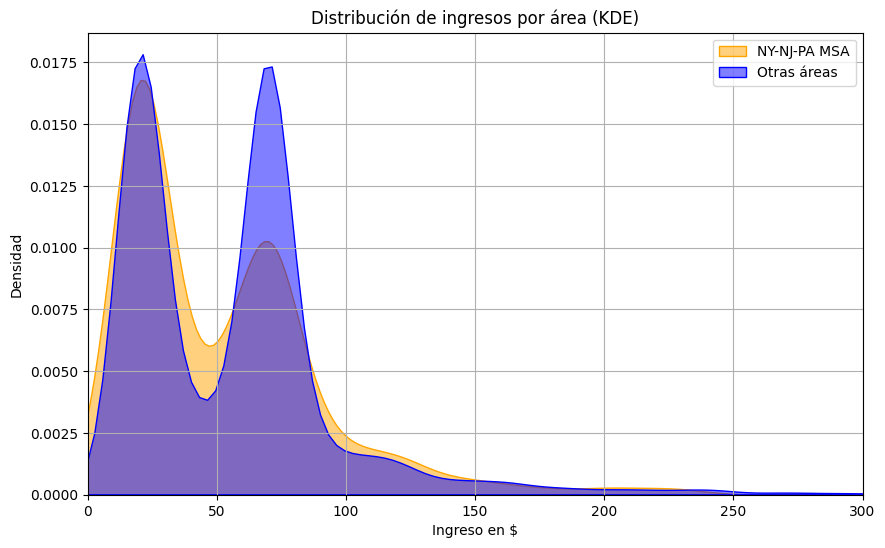

In [71]:
# Prueba las hipótesis

target=user_usage_2.query("city_code=='ny-nj-pa msa' and status=='active'")
rest=user_usage_2.query("city_code!='ny-nj-pa msa' and status=='active'")

# Prueba las hipótesis
target_payments=target["total_payment"]
rest_payments=rest["total_payment"]
alpha=0.05

result=st.ttest_ind(target_payments, rest_payments, equal_var=False)
print('valor p:',result.pvalue)


if result.pvalue<alpha:
    print("Rechazamos la hipótesis nula, las medias son distintas")
else:
    print("No podemos rechazar la hipótesis nula, las medias son iguales")
#represenaión grafica de distribuciones en histograma 
target_income=target["total_payment"]
rest_income=rest["total_payment"]

plt.figure(figsize=(10, 6))
sns.kdeplot(target_income, label="NY-NJ-PA MSA", fill=True, color="orange", alpha=0.5)
sns.kdeplot(rest_income, label="Otras áreas", fill=True, color="blue", alpha=0.5)
plt.xlim(0, 300)
plt.title("Distribución de ingresos por área (KDE)")
plt.xlabel("Ingreso en $")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

In [73]:
"""Para evaluar si existe una diferencia significativa en el tipo de plan contratado entre los usuarios de la región NY-NJ-PA MSA y el resto del país, se utilizó un diagrama de densidad (KDE). Este tipo de gráfico es útil en este contexto, ya que normaliza las distribuciones, permitiendo comparar poblaciones de diferente tamaño sin que el volumen de usuarios afecte la visualización.La distribución de ingresos muestra patrones distintivos entre ambos grupos:Usuarios de NY-NJ-PA MSA (curva naranja) presentan una densidad más concentrada en los rangos de ingreso correspondientes al plan Surf, lo que sugiere una mayor preferencia por este plan en dicha región.Por otro lado, en el resto del país (curva azul) se observa una distribución más equilibrada entre los niveles de ingreso correspondientes tanto al plan Surf como al plan Ultimate, lo que indica una adopción más homogénea de ambos planes en comparación con NY-NJ-PA."""

'Para evaluar si existe una diferencia significativa en el tipo de plan contratado entre los usuarios de la región NY-NJ-PA MSA y el resto del país, se utilizó un diagrama de densidad (KDE). Este tipo de gráfico es útil en este contexto, ya que normaliza las distribuciones, permitiendo comparar poblaciones de diferente tamaño sin que el volumen de usuarios afecte la visualización.La distribución de ingresos muestra patrones distintivos entre ambos grupos:Usuarios de NY-NJ-PA MSA (curva naranja) presentan una densidad más concentrada en los rangos de ingreso correspondientes al plan Surf, lo que sugiere una mayor preferencia por este plan en dicha región.Por otro lado, en el resto del país (curva azul) se observa una distribución más equilibrada entre los niveles de ingreso correspondientes tanto al plan Surf como al plan Ultimate, lo que indica una adopción más homogénea de ambos planes en comparación con NY-NJ-PA.'

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


Conclusión General – Análisis del Comportamiento de Uso y Pago por Plan Tarifario

1. Uso de servicios (minutos, SMS, datos)
- El consumo de minutos e internet tiende a ser ligeramente mayor en el plan Ultimate, pero sin diferencias significativas.
- El consumo de mensajes SMS es considerablemente más bajo en el plan Surf, lo que refleja un desuso generalizado, especialmente entre usuarios de este plan.
- El uso de internet es prácticamente idéntico entre planes, con menos del 1% de diferencia. Las gráficas de densidad y diagramas de caja confirman esta similitud.

2. Comportamiento de pago
- Usuarios del plan Ultimate tienden a pagar únicamente el valor fijo mensual (70 USD), mostrando baja varianza y menor frecuencia de pagos adicionales.
- En contraste, los usuarios del plan Surf presentan mayor dispersión en pagos, con numerosos casos de recargos por sobreuso.
- La prueba estadística de hipótesis (t-test) arrojó un valor p muy bajo, lo que permite concluir que las medias de pago entre planes son significativamente distintas.
- Probabilidad de pagar más que la tarifa base:
  - Ultimate: 56.6%
  - Surf: 71.5%

3. Preferencias por región geográfica
- En la región NY-NJ-PA MSA, hay una clara preferencia por el plan Surf, con menor presencia del plan Ultimate.
- En el resto del país, la adopción de planes es más equilibrada.
- Esta conclusión fue respaldada mediante un gráfico de densidad, el cual eliminó el sesgo por tamaño de muestra.

4. Resumen
- El consumo de servicios no varía significativamente entre los planes.
- El comportamiento de pago sí varía, siendo más predecible y controlado en el plan Ultimate.
- Existe oportunidad de análisis por potencial incremento de ingresos en el manejo de los cargos extra del plan Surf.
- Las decisiones de contratación parecen estar influenciadas más por la percepción del precio y la región geográfica que por el patrón de consumo real.
- La diferencia en un área como NY-NJ indica oportunidades de segmentación en marketing y publicidad.
